# MASTER
### Matteo Grazioso 884055

## Categories

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Disply all columns and all rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# The data is in the same directory as the notebook and is named 'validazioni.txt'. 
# The file contains the data of the validation of tickets in the city of public transport of Venice.

# Import the data into a dataframe of a txt file
df = pd.read_csv('validazioni.txt', header=0, sep='\t')

In [4]:
# Check the first 5 rows of the data
df.head()

,DATA_VALIDAZIONE,SERIALE,FERMATA,DESCRIZIONE,TITOLO,DESCRIZIONE_TITOLO
0,13/05/2022 00:00,65676291870913797,5089,"FERROVIA ""D""",11149,"7gg-Tpl 43,60-ComVe16,40"
1,13/05/2022 00:00,36141384536591364,5032,"FERROVIA ""B""",11107,"48h-Tpl 24,90-ComVe5,10"
2,13/05/2022 00:00,36144856606063108,5031,"P.le Roma ""G",11108,"72h-Tpl 33,40-ComVe6,60"
3,13/05/2022 00:00,36144856608393988,506,VENEZIA,12106,Bigl Aer-Venezia TSC
4,13/05/2022 00:00,36144856608393732,506,VENEZIA,12106,Bigl Aer-Venezia TSC


In [5]:
# Add a new column with the code profile of the ticket
df.insert(6, "TICKET_CODE", 'TBD')

# This column will be filled with the code of the ticket profile according to the ticket type and the ticket validity as follows:
# 1. One-day ticket
# 2. Two-day ticket
# 3. Three-day ticket
# 4. Weekly ticket (Seven-day ticket)
# 5. Monthly ticket
# 6. Annual ticket
# 7. Other ticket (if it is necessary to add other types of tickets)

In [6]:
# Create a dictionary with the ticket code and the ticket profile
dict_tickets = {'1': 'One-day ticket', '2': 'Two-day ticket', '3': 'Three-day ticket', 
                '4': 'Seven-day ticket', '5': 'Monthly ticket', '6': 'Annual ticket',
                '7': 'Other ticket', '7a': 'A_Other ticket', '7b': 'B_Other ticket'}

In [7]:
# Which are the unique values of the column 'DESCRIZIONE_TITOLO'?
df['DESCRIZIONE_TITOLO'].unique()

array(['7gg-Tpl 43,60-ComVe16,40', '48h-Tpl 24,90-ComVe5,10',
       '72h-Tpl 33,40-ComVe6,60', 'Bigl Aer-Venezia TSC',
       'DAILY PASS VENEZIA - AVM', '72H R.Venice+aerop.AR online',
       "75'-Tpl 6,64-ComVe0,86", 'Biglietto 72 ore Roll. Venice',
       "Bigl.Aut.75'Mestre/Lido-tsc", 'Aer+boat-Tpl14,50-C.Ve1,50',
       '72hAerCS-Tpl40,40-CVe6,60', 'Aeroporto-Venezia AR',
       '72 ore R.Venice online', '7 days online no aerobus',
       '72hAerAR-Tpl46,40-CVe6,60', '48hAerCS-Tpl31,90-CVe5,10',
       'Bicicletta "Palmare"', 'L.17-auto "C"da 4,01 a 4,50 mt',
       '72ore online no aerobus', 'L.17-auto "AeB" fino a 4 metri',
       '48ore online no aerobus', "75'-Tpl 13,28-ComVe1,72",
       'Extra tratta 4 ', '48ore online aerobus AR',
       'Daily Pass Venezia Online', 'Ferry17-carri+35q.rim.',
       'Ferry17-autocarri+35q.', 'Ferry11-autocarri+35q.',
       'Extra tratta 5 ', 'L.17-auto "D" oltre metri 4,50',
       'Extra tratta 2 ', 'Ciclomotore fino 50cc',
       'Bicicl

In [8]:
# Get the number of unique values of the column 'DESCRIZIONE_TITOLO'
num_unique_DESCRIZIONE_TITOLO = len(df['DESCRIZIONE_TITOLO'].unique())
print('The number of unique values of the column DESCRIZIONE_TITOLO is: ', num_unique_DESCRIZIONE_TITOLO)

The number of unique values of the column DESCRIZIONE_TITOLO is:  168


In [9]:
# How many tickets are there for each type?
df['DESCRIZIONE_TITOLO'].value_counts()

DAILY PASS VENEZIA - AVM          972478
75'-Tpl 6,64-ComVe0,86            743608
48h-Tpl 24,90-ComVe5,10           600320
72h-Tpl 33,40-ComVe6,60           492911
Bigl.Aut.75'Mestre/Lido-tsc       422668
7gg-Tpl 43,60-ComVe16,40          342870
75'-Tpl 13,28-ComVe1,72           232644
Biglietto 72 ore Roll. Venice     170675
72ore online no aerobus           108357
7 days online no aerobus          101869
PeopleMover+Bus+Tram 75'           85968
Bigl Aer-Venezia TSC               71552
48ore online no aerobus            65389
72 ore R.Venice online             59982
Tragh-Tpl 8,82-C.Ve1,18            38351
Daily Pass Venezia Online          36709
Extra tratta 2                     33102
Cav -Trep + Actv 24H               25071
Extra tratta 3                     22710
Bicicletta "biglietteria"          20041
Jesolo + Actv 24H                  17869
NA-24H metropolitano ORD+2         17203
NA-24H metropolitano ORD+1         15662
L.17-auto "D" oltre metri 4,50     14081
Cav-Trep - S.Mar

### One-day tickets

In [10]:
# Which type of ticket are one-day tickets and how many are there?
# Exclude the tickets that contains also 48h or 72h
df[df['DESCRIZIONE_TITOLO'].str.contains('giornaliero|24h|24 ore|24|Daily|daily|DAILY') & ~df['DESCRIZIONE_TITOLO'].str.contains('48|72')]['DESCRIZIONE_TITOLO'].value_counts()

DAILY PASS VENEZIA - AVM          972478
Daily Pass Venezia Online          36709
Cav -Trep + Actv 24H               25071
Jesolo + Actv 24H                  17869
NA-24H metropolitano ORD+2         17203
NA-24H metropolitano ORD+1         15662
24hAerCS-Tpl22,90-CVe5,10           8048
T.Fusina Ve+ACTV 24 ore             3713
Caorle-P.S.Margh. + Actv 24H        1297
24hAerAR-Tpl28,90-CVe5,10           1209
24ore online aerobus CS              893
Bibione + Actv 24H                   845
NA-24h-Tpl 14,90-Com.Ve5,10          532
24ore online no aerobus              457
24H metropolitano ORD online         435
24H metropolitano ORD+2 online       346
24H metropolitano ORD+1 online       239
24ore online aerobus AR              222
EracleaMare + Actv 24H               204
NA-24H metropolitano ORD.             97
NA-24H metropolitano RES+1            31
Lignano + Actv 24H                    25
Ville Venete+24H actv urb+nav         18
NA-24H metropolitano RES+2            17
NA-24H metropoli

In [11]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity 
df.loc[df['DESCRIZIONE_TITOLO'].str.contains('giornaliero|24h|24 ore|24|Daily|daily|DAILY') & ~df['DESCRIZIONE_TITOLO'].str.contains('48|72'), 'TICKET_CODE'] = '1'

### Two days tickets

In [12]:
# Which type of ticket are two-day tickets and how many are there?
df[df['DESCRIZIONE_TITOLO'].str.contains('48')]['DESCRIZIONE_TITOLO'].value_counts()

48h-Tpl 24,90-ComVe5,10      600320
48ore online no aerobus       65389
48hAerCS-Tpl31,90-CVe5,10      9889
48hAerAR-Tpl37,90-CVe5,10      3312
48ore online aerobus CS        2386
48ore online aerobus AR        1532
Name: DESCRIZIONE_TITOLO, dtype: int64

In [13]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[df['DESCRIZIONE_TITOLO'].str.contains('48'), 'TICKET_CODE'] = '2'

### Three days tickets

In [14]:
# Which type of ticket are three-day tickets and how many are there?
df[df['DESCRIZIONE_TITOLO'].str.contains('72')]['DESCRIZIONE_TITOLO'].value_counts()

72h-Tpl 33,40-ComVe6,60           492911
75'-Tpl 13,28-ComVe1,72           232644
Biglietto 72 ore Roll. Venice     170675
72ore online no aerobus           108357
72 ore R.Venice online             59982
72 ore R.Venice+aeroporto CS       12018
72hAerCS-Tpl40,40-CVe6,60           9855
72hAerAR-Tpl46,40-CVe6,60           8152
72H RVenice+aerop.CS online         6190
72ore online aerobus AR             6055
72H R.Venice+aerop.AR online        5087
72 ore R.Venice+aeroporto AR        4963
72ore online aerobus CS             4565
Atvo Canova+Actv 72H online         2788
T.Fusina Ve+ACTV 72 ore             2691
AtvoCanova+Actv 72Hroll.online      2260
Atvo Canova+Actv 72H                1769
Cav - Trep + Actv 72H                544
Atvo Canova+Actv 72H rolling           1
Name: DESCRIZIONE_TITOLO, dtype: int64

In [15]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[df['DESCRIZIONE_TITOLO'].str.contains('72'), 'TICKET_CODE'] = '3'

### Seven days tickets

In [16]:
# Which type of ticket are weekly tickets and how many are there?
# Exclude the tickets that contains also 72, 75 that are three-day tickets, 17, 48h, 57 that are other types of tickets and
# 'tratt*' and 'tr' that are reserved to specific routes
df[df['DESCRIZIONE_TITOLO'].str.contains('settimanale|7|Weekly') & ~df['DESCRIZIONE_TITOLO'].str.contains('72|75|17|48h|57|tratt*|tr')]['DESCRIZIONE_TITOLO'].value_counts()

7gg-Tpl 43,60-ComVe16,40      342870
7 days online no aerobus      101869
7ggAerAR-Tpl56,60-CVe16,40     13902
7 days online aerobus AR       13366
7ggAerCS-Tpl50,60-CVe16,40      6295
7 days online aerobus CS        3933
Name: DESCRIZIONE_TITOLO, dtype: int64

In [17]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[df['DESCRIZIONE_TITOLO'].str.contains('settimanale|7|Weekly') & ~df['DESCRIZIONE_TITOLO'].str.contains('72|75|17|48h|57|tratt*|tr'), 'TICKET_CODE'] = '4'

### Monthly tickets

In [18]:
# Whick type of ticket are monthly tickets and how many are there?
df[df['DESCRIZIONE_TITOLO'].str.contains('abbonamento|mensile|30')]['DESCRIZIONE_TITOLO'].value_counts()

abbonamento 30 gg.PeopleMover    1509
Name: DESCRIZIONE_TITOLO, dtype: int64

In [19]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[df['DESCRIZIONE_TITOLO'].str.contains('abbonamento|mensile|30'), 'TICKET_CODE'] = '5'

### Yearly tickets

In [20]:
# Which type of ticket are annual tickets and how many are there?
df[df['DESCRIZIONE_TITOLO'].str.contains('annuale|365|year|yearly')]['DESCRIZIONE_TITOLO'].value_counts()

Series([], Name: DESCRIZIONE_TITOLO, dtype: int64)

In [21]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[df['DESCRIZIONE_TITOLO'].str.contains('annuale|365|year|yearly'), 'TICKET_CODE'] = '6'

### 75 minutes tickets

In [22]:
# Which type of ticket are 75' (75 minutes) tickets and how many are there?
df[df['DESCRIZIONE_TITOLO'].str.contains('75')]['DESCRIZIONE_TITOLO'].value_counts()

75'-Tpl 6,64-ComVe0,86            743608
Bigl.Aut.75'Mestre/Lido-tsc       422668
75'-Tpl 13,28-ComVe1,72           232644
PeopleMover+Bus+Tram 75'           85968
Bigl.Mestre/Lido 75' a bordo       12055
ord. navigazione 75' online         6976
75'-Tpl 12,60-CVe2,40 online        3524
Bordo 75min CartaVenezia            3345
PeopleMover+Bus+Tram 75'carnet       648
SpiaggeAR-Tpl 11,75-ComVe1,25        125
VENDITA A BORDO 75' CV                13
VENDITA A BORDO 75' ORD.              10
Name: DESCRIZIONE_TITOLO, dtype: int64

In [23]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[df['DESCRIZIONE_TITOLO'].str.contains('75'), 'TICKET_CODE'] = '7a'

### Other types of tickets

In [24]:
# Which type of ticket are other tickets and how many are there?
# The other tickets are the tickets that are not already classified in the previous categories
df[~df['TICKET_CODE'].isin(['1','2','3','4','5','6', '7a'])]['DESCRIZIONE_TITOLO'].value_counts()

Bigl Aer-Venezia TSC              71552
Tragh-Tpl 8,82-C.Ve1,18           38351
Extra tratta 2                    33102
Extra tratta 3                    22710
Bicicletta "biglietteria"         20041
L.17-auto "D" oltre metri 4,50    14081
Cav-Trep - S.Marco AR             14034
Extra tratta 4                    13678
Jesolo - S.Marco AR               13620
Tragh-Tpl 4,41-C.Ve0,59           11599
Prenotaz OCCASIONALE si barra     11187
L.17-auto "AeB" fino a 4 metri     8279
L.17-auto "C"da 4,01 a 4,50 mt     6941
Extra tratta 1                     6800
Aer+boat-Tpl14,50-C.Ve1,50         6693
Aeroporto-Venezia AR               6520
ARRIVA VENETO tratta 8-9-10        6323
Extra tratta 5                     5347
Bicicletta "Palmare"               4307
Carnet CHIOGGIA 10c. TICKET        4241
Bigl.urbano CHIOGGIA               3430
Gruppi e Scuole                    3421
Gruppi e scuole online TVM ar      3097
Ferry17-autocarri+35q.             3037
Salone Nautico 2022 A/R            2916


In [25]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[~df['TICKET_CODE'].isin(['1','2','3','4','5','6', '7a']), 'TICKET_CODE'] = '7b'

### Summary of the ticket profiles

In [26]:
# Print the number of tickets for each ticket profile code ordered by the code of the ticket profile; print the name of the ticket profile using the dictionary 'dict_tickets'
df['TICKET_CODE'].value_counts().sort_index().rename(dict_tickets).reindex(dict_tickets.values(), fill_value=0)

One-day ticket      1103633
Two-day ticket       682828
Three-day ticket     898863
Seven-day ticket     482235
Monthly ticket         1509
Annual ticket             0
Other ticket              0
A_Other ticket      1511584
B_Other ticket       375989
Name: TICKET_CODE, dtype: int64

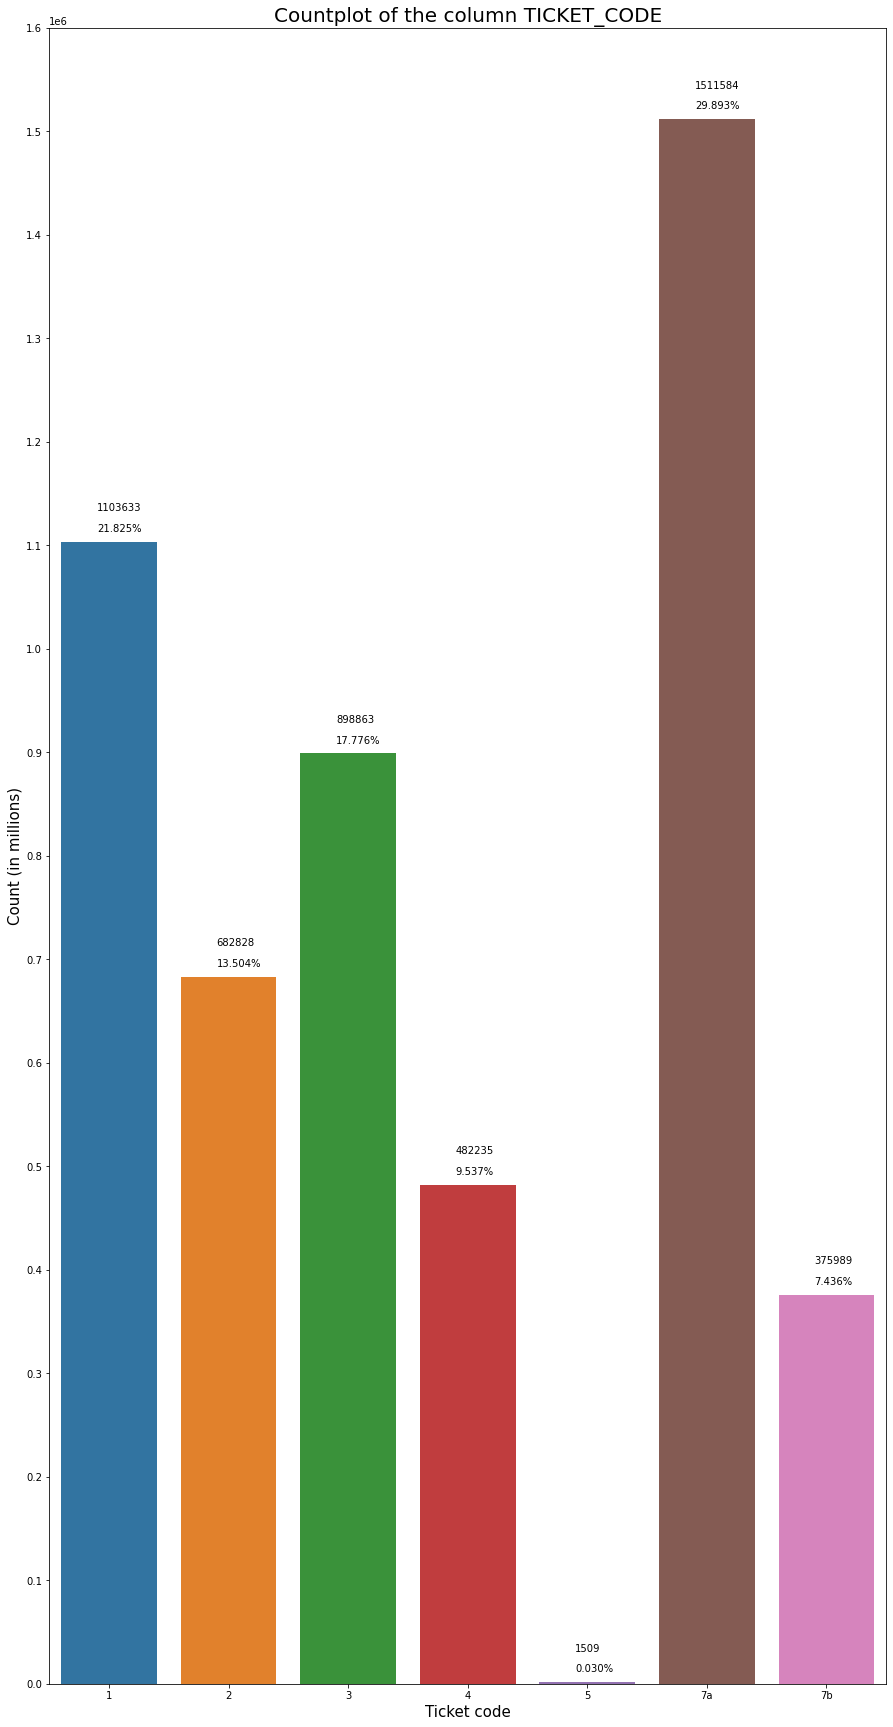

In [27]:
# Countplot of the column 'TICKET_CODE'
fig, ax = plt.subplots(figsize=(15,8))
# Countplot of the column 'TICKET_CODE'
sns.countplot(x='TICKET_CODE', data=df, order=df['TICKET_CODE'].value_counts().sort_index().index)
plt.title('Countplot of the column TICKET_CODE', fontsize=20)
plt.xlabel('Ticket code', fontsize=15)
plt.ylabel('Count (in millions)', fontsize=15)

# Change yticks to have a better visualization
scale = np.arange(0, max(df['TICKET_CODE'].value_counts())+100000, 100000)
plt.yticks(scale)

# Add the percentage of each category on top of the bars
for p in ax.patches:
    ax.annotate('{:.3f}%'.format(100*p.get_height()/len(df)), (p.get_x()+0.3, p.get_height()+10000))

# Add the count of each category on top of the bars
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+30000))

# Add a padding on the top of the plot
plt.subplots_adjust(top=3)

plt.show()

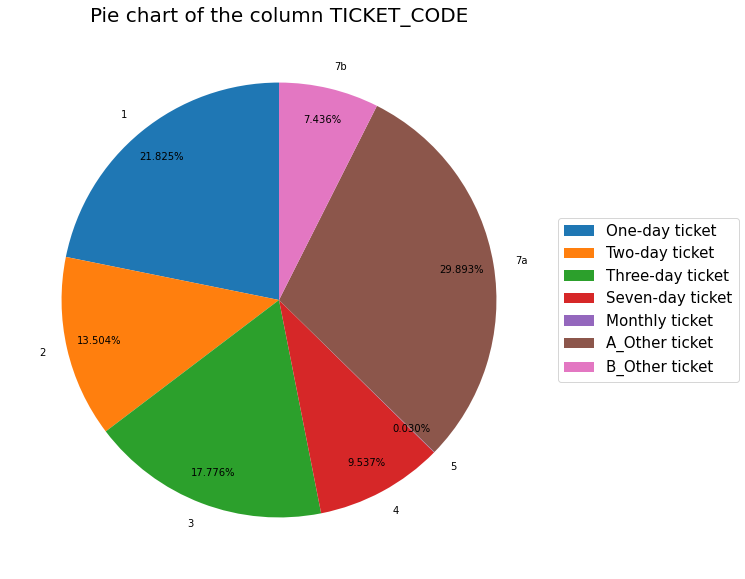

In [28]:
# Plot a pie chart of the column 'TICKET_CODE'
fig, ax = plt.subplots(figsize=(20,10))
df['TICKET_CODE'].value_counts().sort_index().plot.pie(autopct='%1.3f%%', startangle=90, pctdistance=0.85, labeldistance=1.1)

# Add the name of the ticket profile on the pie chart
plt.legend(labels=df['TICKET_CODE'].value_counts().sort_index().rename(dict_tickets).index, loc='center left', bbox_to_anchor=(1, 0, 0.5, 1), fontsize=15)

plt.title('Pie chart of the column TICKET_CODE', fontsize=20)
plt.ylabel('')
fig.patch.set_facecolor('white')
plt.show()

#### Focus on Montly tickets

In [29]:
# Find the 'FERMATA' and 'DESCRIZIONE' distributions of the monthly tickets
df[df['TICKET_CODE'] == '5']['FERMATA'].value_counts().sort_index()

print('The number of different stops (FERMATA) where the monthly tickets are used is: {}'.format(len(df[df['TICKET_CODE'] == '5']['FERMATA'].value_counts().sort_index())))
print('The stops (FERMATA) where the monthly tickets are used are: {}'.format(df[df['TICKET_CODE'] == '5']['FERMATA'].value_counts().sort_index().index))
print('The descriptions of the stops (DESCRIZIONE) of the monthly tickets are: {}'.format(df[df['TICKET_CODE'] == '5']['DESCRIZIONE'].value_counts().sort_index().index))

The number of different stops (FERMATA) where the monthly tickets are used is: 1
The stops (FERMATA) where the monthly tickets are used are: Int64Index([7777], dtype='int64')
The descriptions of the stops (DESCRIZIONE) of the monthly tickets are: Index(['PEOPLE MOVER'], dtype='object')


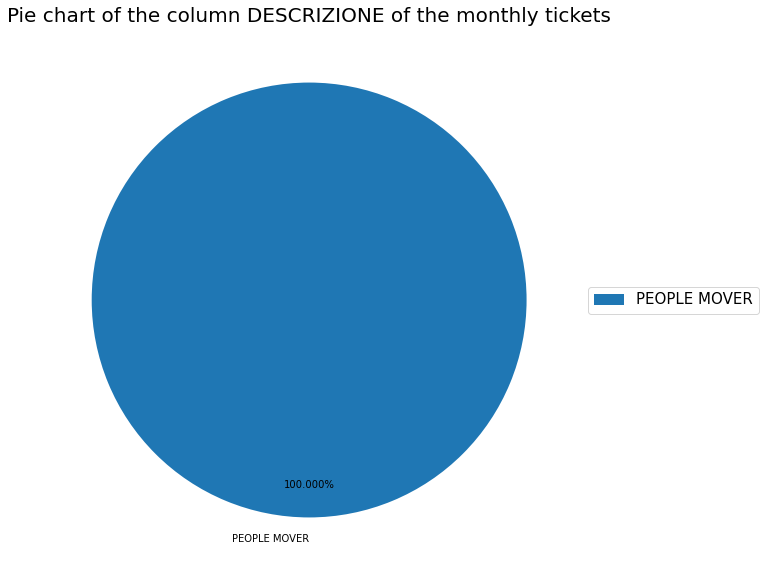

In [30]:
# Plot a pie chart of the column 'DESCRIZIONE' of the monthly tickets
fig, ax = plt.subplots(figsize=(20,10))
df[df['TICKET_CODE'] == '5']['DESCRIZIONE'].value_counts().sort_index().plot.pie(autopct='%1.3f%%', startangle=90, pctdistance=0.85, labeldistance=1.1)

# Add the name of the ticket profile on the pie chart
plt.legend(labels=df[df['TICKET_CODE'] == '5']['DESCRIZIONE'].value_counts().sort_index().index, loc='center left', bbox_to_anchor=(1, 0, 0.5, 1), fontsize=15)

plt.title('Pie chart of the column DESCRIZIONE of the monthly tickets', fontsize=20)
plt.ylabel('')

fig.patch.set_facecolor('white')
plt.show()

## Data Cleaning

### Useless stamps

In [31]:
""" # The timestamp is in the column 'DATA_VALIDAZIONE' in the format '%d/%m-%Y %H:%M'

# Convert the column 'DATA_VALIDAZIONE' to datetime
df['DATA_VALIDAZIONE'] = pd.to_datetime(df['DATA_VALIDAZIONE'])

# Set the format of the column 'DATA_VALIDAZIONE' to '%d/%m/%Y %H:%M'
df['DATA_VALIDAZIONE'] = df['DATA_VALIDAZIONE'].dt.strftime('%d/%m/%Y %H:%M')

# Print the head of the dataframe to see the new format of the column 'DATA_VALIDAZIONE'
df.head() """

" # The timestamp is in the column 'DATA_VALIDAZIONE' in the format '%d/%m-%Y %H:%M'\n\n# Convert the column 'DATA_VALIDAZIONE' to datetime\ndf['DATA_VALIDAZIONE'] = pd.to_datetime(df['DATA_VALIDAZIONE'])\n\n# Set the format of the column 'DATA_VALIDAZIONE' to '%d/%m/%Y %H:%M'\ndf['DATA_VALIDAZIONE'] = df['DATA_VALIDAZIONE'].dt.strftime('%d/%m/%Y %H:%M')\n\n# Print the head of the dataframe to see the new format of the column 'DATA_VALIDAZIONE'\ndf.head() "

In [32]:
# Print the shape of the dataframe
print('The shape of the dataframe is: {}'.format(df.shape))

The shape of the dataframe is: (5056641, 7)


In [33]:
""" # The timestamp is in the column 'DATA_VALIDAZIONE' in the format '%d/%m/%Y %H:%M'
# If there are more than one validation for the same user (SERIALE) in 2 minutes, then the validation is considered as a mistake so keep only the last validation for each user in 2 minutes

# Sort the dataframe by the column 'SERIALE' and the column 'DATA_VALIDAZIONE'
df = df.sort_values(by=['SERIALE', 'DATA_VALIDAZIONE'])

# Print the head of the dataframe to see the new order of the rows
df.head(20) """

" # The timestamp is in the column 'DATA_VALIDAZIONE' in the format '%d/%m/%Y %H:%M'\n# If there are more than one validation for the same user (SERIALE) in 2 minutes, then the validation is considered as a mistake so keep only the last validation for each user in 2 minutes\n\n# Sort the dataframe by the column 'SERIALE' and the column 'DATA_VALIDAZIONE'\ndf = df.sort_values(by=['SERIALE', 'DATA_VALIDAZIONE'])\n\n# Print the head of the dataframe to see the new order of the rows\ndf.head(20) "

In [34]:
""" # Create a new column 'DATA_VALIDAZIONE_2' that is the column 'DATA_VALIDAZIONE' shifted by 1 row
df['DATA_VALIDAZIONE_2'] = df['DATA_VALIDAZIONE'].shift(1)

# Print the head of the dataframe to see the new column 'DATA_VALIDAZIONE_2'
df.head(20) """

" # Create a new column 'DATA_VALIDAZIONE_2' that is the column 'DATA_VALIDAZIONE' shifted by 1 row\ndf['DATA_VALIDAZIONE_2'] = df['DATA_VALIDAZIONE'].shift(1)\n\n# Print the head of the dataframe to see the new column 'DATA_VALIDAZIONE_2'\ndf.head(20) "

In [35]:
""" # Create a new column 'SERIALE_2' that is the column 'SERIALE' shifted by 1 row
df['SERIALE_2'] = df['SERIALE'].shift(1)

# Print the head of the dataframe to see the new column 'SERIALE_2'
df.head(20) """

" # Create a new column 'SERIALE_2' that is the column 'SERIALE' shifted by 1 row\ndf['SERIALE_2'] = df['SERIALE'].shift(1)\n\n# Print the head of the dataframe to see the new column 'SERIALE_2'\ndf.head(20) "

In [36]:
""" # fill the NaN values with 0
df['SERIALE_2'] = df['SERIALE_2'].fillna(0)
df['DATA_VALIDAZIONE_2'] = df['DATA_VALIDAZIONE_2'].fillna(0) """

" # fill the NaN values with 0\ndf['SERIALE_2'] = df['SERIALE_2'].fillna(0)\ndf['DATA_VALIDAZIONE_2'] = df['DATA_VALIDAZIONE_2'].fillna(0) "

In [37]:
""" # Create a new column 'DIFF' that is the difference between the column 'DATA_VALIDAZIONE' and the column 'DATA_VALIDAZIONE_2'
df['DIFF'] = pd.to_datetime(df['DATA_VALIDAZIONE']) - pd.to_datetime(df['DATA_VALIDAZIONE_2'])

# Print the head of the dataframe to see the new column 'DIFF'
df.head(20) """

" # Create a new column 'DIFF' that is the difference between the column 'DATA_VALIDAZIONE' and the column 'DATA_VALIDAZIONE_2'\ndf['DIFF'] = pd.to_datetime(df['DATA_VALIDAZIONE']) - pd.to_datetime(df['DATA_VALIDAZIONE_2'])\n\n# Print the head of the dataframe to see the new column 'DIFF'\ndf.head(20) "

In [38]:
""" # Create a new column 'DIFF_MINUTES' that is the difference between the column 'DATA_VALIDAZIONE' and the column 'DATA_VALIDAZIONE_2' in minutes
df['DIFF_MINUTES'] = df['DIFF'].dt.total_seconds()/60

# Print the head of the dataframe to see the new column 'DIFF_MINUTES'
df.head() """

" # Create a new column 'DIFF_MINUTES' that is the difference between the column 'DATA_VALIDAZIONE' and the column 'DATA_VALIDAZIONE_2' in minutes\ndf['DIFF_MINUTES'] = df['DIFF'].dt.total_seconds()/60\n\n# Print the head of the dataframe to see the new column 'DIFF_MINUTES'\ndf.head() "

In [39]:
""" # If the difference between the column 'DATA_VALIDAZIONE' and the column 'DATA_VALIDAZIONE_2' is less than 2 minutes and the column 'SERIALE' is equal to the column 'SERIALE_2', then the validation is considered as a mistake
# So keep only the last validation for each user in 2 minutes
df_to_drop = df[(df['DIFF_MINUTES'] < 2) & (df['SERIALE'] == df['SERIALE_2'])]
df = df.drop(df[(df['DIFF_MINUTES'] < 2) & (df['SERIALE'] == df['SERIALE_2'])].index) """

" # If the difference between the column 'DATA_VALIDAZIONE' and the column 'DATA_VALIDAZIONE_2' is less than 2 minutes and the column 'SERIALE' is equal to the column 'SERIALE_2', then the validation is considered as a mistake\n# So keep only the last validation for each user in 2 minutes\ndf_to_drop = df[(df['DIFF_MINUTES'] < 2) & (df['SERIALE'] == df['SERIALE_2'])]\ndf = df.drop(df[(df['DIFF_MINUTES'] < 2) & (df['SERIALE'] == df['SERIALE_2'])].index) "

In [40]:
""" # Performing a cleaning operation to avoid useless stamps:
# - if for a user there are several stamps having close timestamps, 2 minutes of difference, I keep only the last stamp of the sequence

# Create a new column 'DATA_VALIDAZIONE_PREC' with the previous timestamp of the column 'DATA_VALIDAZIONE'
df['DATA_VALIDAZIONE_PREC'] = df.groupby('SERIALE')['DATA_VALIDAZIONE'].shift(1)
# Shift the column 'DATA_VALIDAZIONE_PREC' of one row because we want to compare the current timestamp with the previous one

# Create a new column 'DELTA' with the difference between the current timestamp and the previous timestamp
df['DELTA'] = pd.to_datetime(df['DATA_VALIDAZIONE']) - pd.to_datetime(df['DATA_VALIDAZIONE_PREC'])

# Create a new column 'DELTA_MINUTES' with the difference between the current timestamp and the previous timestamp in minutes
df['DELTA_MINUTES'] = df['DELTA'].dt.total_seconds()/60

# Create a new column 'DELTA_MINUTES_ABS' with the absolute value of the difference between the current timestamp 
# and the previous timestamp in minutes
df['DELTA_MINUTES_ABS'] = df['DELTA_MINUTES'].abs()

# Perform a cleaning operation to avoid useless stamps
# save in an other dataframe the rows that will be dropped
df_to_drop = df[df['DELTA_MINUTES_ABS'] <= 2]
df = df[df['DELTA_MINUTES_ABS'] > 2]

# Drop the columns 'DATA_VALIDAZIONE_PREC', 'DELTA', 'DELTA_MINUTES', 'DELTA_MINUTES_ABS'
df.drop(['DATA_VALIDAZIONE_PREC', 'DELTA', 'DELTA_MINUTES', 'DELTA_MINUTES_ABS'], axis=1, inplace=True)  """

" # Performing a cleaning operation to avoid useless stamps:\n# - if for a user there are several stamps having close timestamps, 2 minutes of difference, I keep only the last stamp of the sequence\n\n# Create a new column 'DATA_VALIDAZIONE_PREC' with the previous timestamp of the column 'DATA_VALIDAZIONE'\ndf['DATA_VALIDAZIONE_PREC'] = df.groupby('SERIALE')['DATA_VALIDAZIONE'].shift(1)\n# Shift the column 'DATA_VALIDAZIONE_PREC' of one row because we want to compare the current timestamp with the previous one\n\n# Create a new column 'DELTA' with the difference between the current timestamp and the previous timestamp\ndf['DELTA'] = pd.to_datetime(df['DATA_VALIDAZIONE']) - pd.to_datetime(df['DATA_VALIDAZIONE_PREC'])\n\n# Create a new column 'DELTA_MINUTES' with the difference between the current timestamp and the previous timestamp in minutes\ndf['DELTA_MINUTES'] = df['DELTA'].dt.total_seconds()/60\n\n# Create a new column 'DELTA_MINUTES_ABS' with the absolute value of the difference b

In [41]:
""" # Print the shape of the dataframe
print('The shape of the dataframe is: {}'.format(df.shape)) """

" # Print the shape of the dataframe\nprint('The shape of the dataframe is: {}'.format(df.shape)) "

In [42]:
""" # Print the head of the dataframe df_to_drop ordered by 'SERIALE' and 'DATA_VALIDAZIONE'
df_to_drop.sort_values(by=['SERIALE', 'DATA_VALIDAZIONE']).head(20) """

" # Print the head of the dataframe df_to_drop ordered by 'SERIALE' and 'DATA_VALIDAZIONE'\ndf_to_drop.sort_values(by=['SERIALE', 'DATA_VALIDAZIONE']).head(20) "

### Stops similar

In [43]:
# Print the unique values of the column 'DESCRIZIONE'
print('The unique values of the column DESCRIZIONE are: {}'.format(df['DESCRIZIONE'].unique()))

The unique values of the column DESCRIZIONE are: ['FERROVIA "D"' 'FERROVIA "B"' 'P.le Roma "G' 'VENEZIA' 'Giudecca Pal'
 'S. Marcuola-' 'VENEZIA CORS' 'San Marco-Sa' 'Piave Fiume' 'F.TE NOVE "C'
 'Aeroporto MA' 'Rialto' 'Pellestrina' 'San Marco Va' 'ACCADEMIA "B'
 'LIDO S.M.E. ' 'P.le Roma "E' 'Pellestrina ' 'San Stae' 'Mestre Centr'
 'Spinea Marti' 'Chioggia Pia' 'P.le Roma "B' 'Tronchetto F' 'Zattere'
 'GIGLIO' "Liberta' San" 'San Marco Ma' 'Don Sturzo V' 'Santa Maria '
 "Ca' D'Oro" 'Tronchetto M' "San Toma'" 'San Rocco Br' 'Zitelle'
 'San Giorgio' 'GIARDINI "B"' "Sant' Elena" 'Santa Marta' "Liberta' Rig"
 'Ferrovia "E"' 'Alberoni Far' 'Dolo Centro' 'Spinea Orgna' 'ARSENALE "B"'
 'Gallo Barbar' 'Gallo Giolit' 'Rialto Merca' 'Orto' 'Bandiera Ghe'
 'Garibaldi Mu' "San Dona' Ri" 'Punta Sabbio' 'Bissuola Col'
 'Oriago Stazi' 'Stazione Pad' 'Canal Leone' 'Lavelli Paol' 'Rizzardi Car'
 'P.le Roma "F' 'Lido San Nic' 'Stazione MES' 'Garibaldi Og'
 'F.TE NOVE "A' 'Carducci Pas' 'Noale' 'Peron

In [100]:
# Define a function that returns the common prefix of a list of strings
def get_common_prefix(string_list):
    # input di tipo  string_list = ["Mestre Centro", "Mirano Centro"]
    first_prefix = string_list[0].split(" ")[0]
    # create and empty dictionary
    prefix_dict = {}

    for string in string_list[1:]:
        if not string.startswith(first_prefix):
            first_prefix = string.split(" ")[0]
            if string.startswith(first_prefix):
                # In the dictionary add the new prefix as key and the list of strings that have this prefix as value
                prefix_dict[first_prefix] = [string for string in string_list if string.startswith(first_prefix)]
        else:
            # In the dictionary add the new prefix as key and the list of strings that have this prefix as value
            prefix_dict[first_prefix] = [string for string in string_list if string.startswith(first_prefix)]
    return prefix_dict
    

In [101]:
# Use the function get_common_prefix to find the common prefix of the strings in the column 'DESCRIZIONE' and print the result
# Crete a string list with the unique values of the column 'DESCRIZIONE'
string_list = df['DESCRIZIONE'].unique().tolist()

# Use the function get_common_prefix to find the common prefix of the strings in the column 'DESCRIZIONE' and print the result
print('The common prefix of the strings in the column DESCRIZIONE is: {}'.format(get_common_prefix(string_list)))

The common prefix of the strings in the column DESCRIZIONE is: {'FERROVIA': ['FERROVIA "D"', 'FERROVIA "B"', 'FERROVIA "C"', 'FERROVIA "A"'], 'P.le': ['P.le Roma "G', 'P.le Roma "E', 'P.le Roma "B', 'P.le Roma "F', 'P.le Roma "C', 'P.le Roma "D', 'P.le Roma "A'], 'VENEZIA': ['VENEZIA', 'VENEZIA CORS'], 'Giudecca': ['Giudecca Pal'], 'S.': ['S. Marcuola-', 'S.ERASMO CHI', 'S.ERASMO CAP', 'S. Erasmo Pu', 'S. MARCO (Gi', 'S. Pietro in'], 'San': ['San Marco-Sa', 'San Marco Va', 'San Stae', 'San Marco Ma', 'Santa Maria ', "San Toma'", 'San Rocco Br', 'San Giorgio', "Sant' Elena", 'Santa Marta', "San Dona' Ri", "San Dona' Pa", 'San Marco Ca', "Sant' Angelo", "Sant'Antonio", "San Dona' Ce", "San Dona' Pi", 'San Liberale', 'San Samuele', "San Dona' Ma", 'San Marco Mo', 'San Silvestr', 'San Marco Bo', 'San Marco Fo', 'San Marco Mu', 'San Marco Sa', "San Nicolo'", 'Santa Marghe', "Sant' Alvise", 'San Servolo', 'San Basilio', "San Dona' Va", "San Dona' Fa", 'San Pietro d', "San Nicolo' ", 'San Laz

In [63]:
string_list

['FERROVIA "D"',
 'FERROVIA "B"',
 'P.le Roma "G',
 'VENEZIA',
 'Giudecca Pal',
 'S. Marcuola-',
 'VENEZIA CORS',
 'San Marco-Sa',
 'Piave Fiume',
 'F.TE NOVE "C',
 'Aeroporto MA',
 'Rialto',
 'Pellestrina',
 'San Marco Va',
 'ACCADEMIA "B',
 'LIDO S.M.E. ',
 'P.le Roma "E',
 'Pellestrina ',
 'San Stae',
 'Mestre Centr',
 'Spinea Marti',
 'Chioggia Pia',
 'P.le Roma "B',
 'Tronchetto F',
 'Zattere',
 'GIGLIO',
 "Liberta' San",
 'San Marco Ma',
 'Don Sturzo V',
 'Santa Maria ',
 "Ca' D'Oro",
 'Tronchetto M',
 "San Toma'",
 'San Rocco Br',
 'Zitelle',
 'San Giorgio',
 'GIARDINI "B"',
 "Sant' Elena",
 'Santa Marta',
 "Liberta' Rig",
 'Ferrovia "E"',
 'Alberoni Far',
 'Dolo Centro',
 'Spinea Orgna',
 'ARSENALE "B"',
 'Gallo Barbar',
 'Gallo Giolit',
 'Rialto Merca',
 'Orto',
 'Bandiera Ghe',
 'Garibaldi Mu',
 "San Dona' Ri",
 'Punta Sabbio',
 'Bissuola Col',
 'Oriago Stazi',
 'Stazione Pad',
 'Canal Leone',
 'Lavelli Paol',
 'Rizzardi Car',
 'P.le Roma "F',
 'Lido San Nic',
 'Stazione MES'